# Klasifikasi Data Microarray Menggunakan DWT & Random Forest

### Import Packages and Dataset

***Packages***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

import pywt

import warnings
warnings.filterwarnings('ignore')

***Dataset***

- Colon Cancer

In [2]:
data = pd.read_csv("data/colonTumor.csv")
data_length = data.shape[1]
data_length

2001

In [5]:
column = []
for i in range(data_length):
    column.append("atribut"+str(i))

In [6]:
data_colon = pd.read_csv("data/colonTumor.csv", header=None, names=column)
data_colon.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut1991,atribut1992,atribut1993,atribut1994,atribut1995,atribut1996,atribut1997,atribut1998,atribut1999,atribut2000
0,8589.4163,5468.2409,4263.4075,4064.9357,1997.8929,5282.3250,2169.7200,2773.4212,7526.3862,4607.6762,...,67.56125,259.91250,138.89875,88.23250,39.667857,67.82875,75.67750,83.52250,28.70125,negative
1,9164.2537,6719.5295,4883.4487,3718.1589,2015.2214,5569.9071,3849.0588,2793.3875,7017.7338,4802.2524,...,92.23875,96.27625,150.59000,82.23750,85.033333,152.19500,186.56750,44.47250,16.77375,positive
2,3825.7050,6970.3614,5369.9688,4705.6500,1166.5536,1572.1679,1325.4025,1472.2587,3296.9512,2786.5821,...,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625,negative
3,6246.4487,7823.5341,5955.8350,3975.5643,2002.6131,2130.5429,1531.1425,1714.6312,3869.7850,4989.4071,...,41.68375,5.92500,183.00625,74.52875,67.710714,48.33875,42.52000,49.98250,16.08500,positive
4,3230.3287,3694.4500,3400.7400,3463.5857,2181.4202,2922.7821,2069.2463,2948.5750,3303.3712,3109.4131,...,76.60375,161.35000,61.70125,54.56375,223.359520,73.09875,57.59875,7.48875,31.81250,negative


In [7]:
data_colon = data_colon.rename(columns={'atribut2000': 'status'})
data_colon.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut1991,atribut1992,atribut1993,atribut1994,atribut1995,atribut1996,atribut1997,atribut1998,atribut1999,status
0,8589.4163,5468.2409,4263.4075,4064.9357,1997.8929,5282.3250,2169.7200,2773.4212,7526.3862,4607.6762,...,67.56125,259.91250,138.89875,88.23250,39.667857,67.82875,75.67750,83.52250,28.70125,negative
1,9164.2537,6719.5295,4883.4487,3718.1589,2015.2214,5569.9071,3849.0588,2793.3875,7017.7338,4802.2524,...,92.23875,96.27625,150.59000,82.23750,85.033333,152.19500,186.56750,44.47250,16.77375,positive
2,3825.7050,6970.3614,5369.9688,4705.6500,1166.5536,1572.1679,1325.4025,1472.2587,3296.9512,2786.5821,...,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625,negative
3,6246.4487,7823.5341,5955.8350,3975.5643,2002.6131,2130.5429,1531.1425,1714.6312,3869.7850,4989.4071,...,41.68375,5.92500,183.00625,74.52875,67.710714,48.33875,42.52000,49.98250,16.08500,positive
4,3230.3287,3694.4500,3400.7400,3463.5857,2181.4202,2922.7821,2069.2463,2948.5750,3303.3712,3109.4131,...,76.60375,161.35000,61.70125,54.56375,223.359520,73.09875,57.59875,7.48875,31.81250,negative


In [8]:
data_colon.loc[data_colon['status'] == 'negative', ['status']] = 0
data_colon.loc[data_colon['status'] == 'positive', ['status']] = 1
data_colon.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut1991,atribut1992,atribut1993,atribut1994,atribut1995,atribut1996,atribut1997,atribut1998,atribut1999,status
0,8589.4163,5468.2409,4263.4075,4064.9357,1997.8929,5282.3250,2169.7200,2773.4212,7526.3862,4607.6762,...,67.56125,259.91250,138.89875,88.23250,39.667857,67.82875,75.67750,83.52250,28.70125,0
1,9164.2537,6719.5295,4883.4487,3718.1589,2015.2214,5569.9071,3849.0588,2793.3875,7017.7338,4802.2524,...,92.23875,96.27625,150.59000,82.23750,85.033333,152.19500,186.56750,44.47250,16.77375,1
2,3825.7050,6970.3614,5369.9688,4705.6500,1166.5536,1572.1679,1325.4025,1472.2587,3296.9512,2786.5821,...,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625,0
3,6246.4487,7823.5341,5955.8350,3975.5643,2002.6131,2130.5429,1531.1425,1714.6312,3869.7850,4989.4071,...,41.68375,5.92500,183.00625,74.52875,67.710714,48.33875,42.52000,49.98250,16.08500,1
4,3230.3287,3694.4500,3400.7400,3463.5857,2181.4202,2922.7821,2069.2463,2948.5750,3303.3712,3109.4131,...,76.60375,161.35000,61.70125,54.56375,223.359520,73.09875,57.59875,7.48875,31.81250,0


In [9]:
data_colon = data_colon.apply(pd.to_numeric)

- Lung Cancer

In [10]:
data = pd.read_csv("data/lungCancer_train.csv")
data_length = data.shape[1]
data_length

12534

In [11]:
column = []
for i in range(data_length):
    column.append("atribut"+str(i))

In [12]:
data_lung = pd.read_csv("data/lungCancer_train.csv", header=None, names=column)
data_lung = data_lung.append(pd.read_csv("data/lungCancer_test.csv", header=None, names=column))
data_lung.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut12524,atribut12525,atribut12526,atribut12527,atribut12528,atribut12529,atribut12530,atribut12531,atribut12532,atribut12533
0,199.1,38.7,-1.0,-55.9,4.5,1042.5,-12.0,783.2,320.9,1384.8,...,8.6,12.7,26.3,176.9,22.2,41.8,36.1,21.8,3.2,Mesothelioma
1,188.5,82.0,-10.1,30.5,-6.6,877.1,71.0,309.9,2347.2,1017.6,...,14.5,-32.3,24.0,78.5,24.4,52.6,28.9,-6.6,40.6,Mesothelioma
2,284.1,35.6,-19.6,-111.2,-25.0,993.4,11.3,594.1,485.4,843.9,...,13.2,59.0,1.8,49.3,1.5,52.2,257.0,25.1,-79.6,Mesothelioma
3,204.5,20.4,9.4,-99.5,-10.1,273.9,22.8,713.3,250.0,1212.2,...,18.9,18.7,28.5,193.3,5.4,41.7,4.5,11.2,-43.3,Mesothelioma
4,213.1,98.3,31.4,46.1,75.0,1568.6,17.8,769.2,4540.3,947.6,...,14.7,68.9,25.5,40.9,-38.2,27.7,62.2,8.3,-172.5,Mesothelioma


In [13]:
data_lung = data_lung.rename(columns={'atribut12533': 'status'})
data_lung.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut12524,atribut12525,atribut12526,atribut12527,atribut12528,atribut12529,atribut12530,atribut12531,atribut12532,status
0,199.1,38.7,-1.0,-55.9,4.5,1042.5,-12.0,783.2,320.9,1384.8,...,8.6,12.7,26.3,176.9,22.2,41.8,36.1,21.8,3.2,Mesothelioma
1,188.5,82.0,-10.1,30.5,-6.6,877.1,71.0,309.9,2347.2,1017.6,...,14.5,-32.3,24.0,78.5,24.4,52.6,28.9,-6.6,40.6,Mesothelioma
2,284.1,35.6,-19.6,-111.2,-25.0,993.4,11.3,594.1,485.4,843.9,...,13.2,59.0,1.8,49.3,1.5,52.2,257.0,25.1,-79.6,Mesothelioma
3,204.5,20.4,9.4,-99.5,-10.1,273.9,22.8,713.3,250.0,1212.2,...,18.9,18.7,28.5,193.3,5.4,41.7,4.5,11.2,-43.3,Mesothelioma
4,213.1,98.3,31.4,46.1,75.0,1568.6,17.8,769.2,4540.3,947.6,...,14.7,68.9,25.5,40.9,-38.2,27.7,62.2,8.3,-172.5,Mesothelioma


In [14]:
data_lung.loc[data_lung['status'] == 'ADCA', ['status']] = 0
data_lung.loc[data_lung['status'] == 'Mesothelioma', ['status']] = 1
data_lung.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut12524,atribut12525,atribut12526,atribut12527,atribut12528,atribut12529,atribut12530,atribut12531,atribut12532,status
0,199.1,38.7,-1.0,-55.9,4.5,1042.5,-12.0,783.2,320.9,1384.8,...,8.6,12.7,26.3,176.9,22.2,41.8,36.1,21.8,3.2,1
1,188.5,82.0,-10.1,30.5,-6.6,877.1,71.0,309.9,2347.2,1017.6,...,14.5,-32.3,24.0,78.5,24.4,52.6,28.9,-6.6,40.6,1
2,284.1,35.6,-19.6,-111.2,-25.0,993.4,11.3,594.1,485.4,843.9,...,13.2,59.0,1.8,49.3,1.5,52.2,257.0,25.1,-79.6,1
3,204.5,20.4,9.4,-99.5,-10.1,273.9,22.8,713.3,250.0,1212.2,...,18.9,18.7,28.5,193.3,5.4,41.7,4.5,11.2,-43.3,1
4,213.1,98.3,31.4,46.1,75.0,1568.6,17.8,769.2,4540.3,947.6,...,14.7,68.9,25.5,40.9,-38.2,27.7,62.2,8.3,-172.5,1


In [15]:
data_lung = data_lung.apply(pd.to_numeric)

- Ovarian Cancer

In [16]:
data = pd.read_csv("data/ovarian_61902.csv")
data_length = data.shape[1]
data_length

15155

In [17]:
column = []
for i in range(data_length):
    column.append("atribut"+str(i))

In [18]:
data_ovarian = pd.read_csv("data/ovarian_61902.csv", header=None, names=column)
data_ovarian.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut15145,atribut15146,atribut15147,atribut15148,atribut15149,atribut15150,atribut15151,atribut15152,atribut15153,atribut15154
0,0.494626,0.263735,0.321841,0.220934,0.297622,0.316458,0.154763,0.223685,0.304346,0.241757,...,0.483622,0.449296,0.449296,0.449296,0.449296,0.449296,0.449296,0.449296,0.449296,Normal
1,0.258063,0.406593,0.321841,0.069771,0.333335,0.354432,0.321431,0.144740,0.260869,0.142853,...,0.631765,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,Normal
2,0.537636,0.032966,0.321841,0.209307,0.404762,0.113927,0.369049,0.223685,0.536231,0.131865,...,0.038462,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,Normal
3,0.000000,0.395605,0.310347,0.197673,0.404762,0.455701,0.416666,0.210527,0.420292,0.274723,...,0.497864,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,Normal
4,0.526884,0.395605,0.367817,0.383719,0.488099,0.392405,0.238094,0.500000,0.362316,0.274723,...,0.267096,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,Normal


In [19]:
data_ovarian = data_ovarian.rename(columns={'atribut15154': 'status'})
data_ovarian.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut15145,atribut15146,atribut15147,atribut15148,atribut15149,atribut15150,atribut15151,atribut15152,atribut15153,status
0,0.494626,0.263735,0.321841,0.220934,0.297622,0.316458,0.154763,0.223685,0.304346,0.241757,...,0.483622,0.449296,0.449296,0.449296,0.449296,0.449296,0.449296,0.449296,0.449296,Normal
1,0.258063,0.406593,0.321841,0.069771,0.333335,0.354432,0.321431,0.144740,0.260869,0.142853,...,0.631765,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,Normal
2,0.537636,0.032966,0.321841,0.209307,0.404762,0.113927,0.369049,0.223685,0.536231,0.131865,...,0.038462,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,Normal
3,0.000000,0.395605,0.310347,0.197673,0.404762,0.455701,0.416666,0.210527,0.420292,0.274723,...,0.497864,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,Normal
4,0.526884,0.395605,0.367817,0.383719,0.488099,0.392405,0.238094,0.500000,0.362316,0.274723,...,0.267096,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,Normal


In [20]:
data_ovarian.loc[data_ovarian['status'] == 'Normal', ['status']] = 0
data_ovarian.loc[data_ovarian['status'] == 'Cancer', ['status']] = 1
data_ovarian.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut15145,atribut15146,atribut15147,atribut15148,atribut15149,atribut15150,atribut15151,atribut15152,atribut15153,status
0,0.494626,0.263735,0.321841,0.220934,0.297622,0.316458,0.154763,0.223685,0.304346,0.241757,...,0.483622,0.449296,0.449296,0.449296,0.449296,0.449296,0.449296,0.449296,0.449296,0
1,0.258063,0.406593,0.321841,0.069771,0.333335,0.354432,0.321431,0.144740,0.260869,0.142853,...,0.631765,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,0
2,0.537636,0.032966,0.321841,0.209307,0.404762,0.113927,0.369049,0.223685,0.536231,0.131865,...,0.038462,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,0
3,0.000000,0.395605,0.310347,0.197673,0.404762,0.455701,0.416666,0.210527,0.420292,0.274723,...,0.497864,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,0
4,0.526884,0.395605,0.367817,0.383719,0.488099,0.392405,0.238094,0.500000,0.362316,0.274723,...,0.267096,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,0


In [21]:
data_ovarian = data_ovarian.apply(pd.to_numeric)

- Prostate Tumor

In [22]:
data = pd.read_csv("data/prostate_train.csv")
data_length = data.shape[1]
data_length

12601

In [23]:
column = []
for i in range(data_length):
    column.append("atribut"+str(i))

In [24]:
data_prostate = pd.read_csv("data/prostate_train.csv", header=None, names=column)
data_prostate = data_prostate.append(pd.read_csv("data/prostate_test.csv", header=None, names=column))
data_prostate.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut12591,atribut12592,atribut12593,atribut12594,atribut12595,atribut12596,atribut12597,atribut12598,atribut12599,atribut12600
0,-9.0,1.0,1.0,15.0,-2.0,-3.0,4.0,8.0,-12.0,-12.0,...,5.0,3.0,21,15.0,1.0,0,14.0,-23.0,14.0,Tumor
1,-2.0,1.0,1.0,4.0,-2.0,-5.0,0.0,8.0,-5.0,-9.0,...,3.0,2.0,12,7.0,4.0,5,4.0,-10.0,25.0,Tumor
2,-6.0,17.0,6.0,29.0,4.0,-11.0,-8.0,10.0,-24.0,-32.0,...,-5.0,11.0,11,36.0,8.0,7,21.0,-82.0,10.0,Tumor
3,0.0,9.0,4.0,19.0,-10.0,-18.0,-18.0,5.0,-33.0,-31.0,...,-7.0,6.0,9,22.0,3.0,20,-7.0,-62.0,24.0,Tumor
4,-1.0,0.0,1.0,5.0,0.0,-4.0,1.0,6.0,-4.0,-9.0,...,6.0,1.0,140,10.0,3.0,8,8.0,-27.0,20.0,Tumor


In [25]:
data_prostate = data_prostate.rename(columns={'atribut12600': 'status'})
data_prostate.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut12591,atribut12592,atribut12593,atribut12594,atribut12595,atribut12596,atribut12597,atribut12598,atribut12599,status
0,-9.0,1.0,1.0,15.0,-2.0,-3.0,4.0,8.0,-12.0,-12.0,...,5.0,3.0,21,15.0,1.0,0,14.0,-23.0,14.0,Tumor
1,-2.0,1.0,1.0,4.0,-2.0,-5.0,0.0,8.0,-5.0,-9.0,...,3.0,2.0,12,7.0,4.0,5,4.0,-10.0,25.0,Tumor
2,-6.0,17.0,6.0,29.0,4.0,-11.0,-8.0,10.0,-24.0,-32.0,...,-5.0,11.0,11,36.0,8.0,7,21.0,-82.0,10.0,Tumor
3,0.0,9.0,4.0,19.0,-10.0,-18.0,-18.0,5.0,-33.0,-31.0,...,-7.0,6.0,9,22.0,3.0,20,-7.0,-62.0,24.0,Tumor
4,-1.0,0.0,1.0,5.0,0.0,-4.0,1.0,6.0,-4.0,-9.0,...,6.0,1.0,140,10.0,3.0,8,8.0,-27.0,20.0,Tumor


In [26]:
data_prostate.loc[data_prostate['status'] == 'Normal', ['status']] = 0
data_prostate.loc[data_prostate['status'] == 'Tumor', ['status']] = 1
data_prostate.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut12591,atribut12592,atribut12593,atribut12594,atribut12595,atribut12596,atribut12597,atribut12598,atribut12599,status
0,-9.0,1.0,1.0,15.0,-2.0,-3.0,4.0,8.0,-12.0,-12.0,...,5.0,3.0,21,15.0,1.0,0,14.0,-23.0,14.0,1
1,-2.0,1.0,1.0,4.0,-2.0,-5.0,0.0,8.0,-5.0,-9.0,...,3.0,2.0,12,7.0,4.0,5,4.0,-10.0,25.0,1
2,-6.0,17.0,6.0,29.0,4.0,-11.0,-8.0,10.0,-24.0,-32.0,...,-5.0,11.0,11,36.0,8.0,7,21.0,-82.0,10.0,1
3,0.0,9.0,4.0,19.0,-10.0,-18.0,-18.0,5.0,-33.0,-31.0,...,-7.0,6.0,9,22.0,3.0,20,-7.0,-62.0,24.0,1
4,-1.0,0.0,1.0,5.0,0.0,-4.0,1.0,6.0,-4.0,-9.0,...,6.0,1.0,140,10.0,3.0,8,8.0,-27.0,20.0,1


In [27]:
data_prostate = data_prostate.apply(pd.to_numeric)

- Central Nervous 

In [28]:
data = pd.read_csv("data/centralNervousSystem_outcome.csv")
data_length = data.shape[1]
data_length

7130

In [29]:
column = []
for i in range(data_length):
    column.append("atribut"+str(i))

In [30]:
data_central = pd.read_csv("data/centralNervousSystem_outcome.csv", header=None, names=column)
data_central.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut7120,atribut7121,atribut7122,atribut7123,atribut7124,atribut7125,atribut7126,atribut7127,atribut7128,atribut7129
0,-60,-109,45,22,7,-61,-211,-102,-20,98,...,1082,-12,44,-48,123,89,-25,56,-63,Class1
1,-159,-113,-62,-16,-160,-395,97,-157,15,-8,...,1295,-677,-452,-750,1273,-1,-750,-45,-293,Class1
2,-119,-31,4,-11,-197,-541,-277,-166,17,392,...,592,55,88,-37,310,159,11,2,2,Class1
3,41,9,-256,370,-302,-680,254,31,186,358,...,433,71,-237,-166,52,-48,-183,328,-244,Class1
4,-165,-57,171,216,-692,-381,762,-6,44,216,...,2160,-120,-82,-25,3888,393,-38,190,38,Class1


In [31]:
data_central = data_central.rename(columns={'atribut7129': 'status'})
data_central.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut7120,atribut7121,atribut7122,atribut7123,atribut7124,atribut7125,atribut7126,atribut7127,atribut7128,status
0,-60,-109,45,22,7,-61,-211,-102,-20,98,...,1082,-12,44,-48,123,89,-25,56,-63,Class1
1,-159,-113,-62,-16,-160,-395,97,-157,15,-8,...,1295,-677,-452,-750,1273,-1,-750,-45,-293,Class1
2,-119,-31,4,-11,-197,-541,-277,-166,17,392,...,592,55,88,-37,310,159,11,2,2,Class1
3,41,9,-256,370,-302,-680,254,31,186,358,...,433,71,-237,-166,52,-48,-183,328,-244,Class1
4,-165,-57,171,216,-692,-381,762,-6,44,216,...,2160,-120,-82,-25,3888,393,-38,190,38,Class1


In [32]:
data_central.loc[data_central['status'] == 'Class0', ['status']] = 0
data_central.loc[data_central['status'] == 'Class1', ['status']] = 1
data_central.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut7120,atribut7121,atribut7122,atribut7123,atribut7124,atribut7125,atribut7126,atribut7127,atribut7128,status
0,-60,-109,45,22,7,-61,-211,-102,-20,98,...,1082,-12,44,-48,123,89,-25,56,-63,1
1,-159,-113,-62,-16,-160,-395,97,-157,15,-8,...,1295,-677,-452,-750,1273,-1,-750,-45,-293,1
2,-119,-31,4,-11,-197,-541,-277,-166,17,392,...,592,55,88,-37,310,159,11,2,2,1
3,41,9,-256,370,-302,-680,254,31,186,358,...,433,71,-237,-166,52,-48,-183,328,-244,1
4,-165,-57,171,216,-692,-381,762,-6,44,216,...,2160,-120,-82,-25,3888,393,-38,190,38,1


In [33]:
data_central = data_central.apply(pd.to_numeric)

### Mengetahui missing value

- Colon Cancer

In [34]:
data_colon.dropna(axis=1).shape

(62, 2001)

In [35]:
pd.isnull(data_colon).sum()

atribut0       0
atribut1       0
atribut2       0
atribut3       0
atribut4       0
atribut5       0
atribut6       0
atribut7       0
atribut8       0
atribut9       0
atribut10      0
atribut11      0
atribut12      0
atribut13      0
atribut14      0
atribut15      0
atribut16      0
atribut17      0
atribut18      0
atribut19      0
atribut20      0
atribut21      0
atribut22      0
atribut23      0
atribut24      0
atribut25      0
atribut26      0
atribut27      0
atribut28      0
atribut29      0
              ..
atribut1971    0
atribut1972    0
atribut1973    0
atribut1974    0
atribut1975    0
atribut1976    0
atribut1977    0
atribut1978    0
atribut1979    0
atribut1980    0
atribut1981    0
atribut1982    0
atribut1983    0
atribut1984    0
atribut1985    0
atribut1986    0
atribut1987    0
atribut1988    0
atribut1989    0
atribut1990    0
atribut1991    0
atribut1992    0
atribut1993    0
atribut1994    0
atribut1995    0
atribut1996    0
atribut1997    0
atribut1998   

- Lung Cancer 

In [36]:
data_lung.dropna(axis=1).shape

(181, 12534)

In [37]:
pd.isnull(data_lung).sum()

atribut0        0
atribut1        0
atribut2        0
atribut3        0
atribut4        0
atribut5        0
atribut6        0
atribut7        0
atribut8        0
atribut9        0
atribut10       0
atribut11       0
atribut12       0
atribut13       0
atribut14       0
atribut15       0
atribut16       0
atribut17       0
atribut18       0
atribut19       0
atribut20       0
atribut21       0
atribut22       0
atribut23       0
atribut24       0
atribut25       0
atribut26       0
atribut27       0
atribut28       0
atribut29       0
               ..
atribut12504    0
atribut12505    0
atribut12506    0
atribut12507    0
atribut12508    0
atribut12509    0
atribut12510    0
atribut12511    0
atribut12512    0
atribut12513    0
atribut12514    0
atribut12515    0
atribut12516    0
atribut12517    0
atribut12518    0
atribut12519    0
atribut12520    0
atribut12521    0
atribut12522    0
atribut12523    0
atribut12524    0
atribut12525    0
atribut12526    0
atribut12527    0
atribut125

- Ovarian Cancer 

In [38]:
data_ovarian.dropna(axis=1).shape

(253, 15155)

In [39]:
pd.isnull(data_ovarian).sum()

atribut0        0
atribut1        0
atribut2        0
atribut3        0
atribut4        0
atribut5        0
atribut6        0
atribut7        0
atribut8        0
atribut9        0
atribut10       0
atribut11       0
atribut12       0
atribut13       0
atribut14       0
atribut15       0
atribut16       0
atribut17       0
atribut18       0
atribut19       0
atribut20       0
atribut21       0
atribut22       0
atribut23       0
atribut24       0
atribut25       0
atribut26       0
atribut27       0
atribut28       0
atribut29       0
               ..
atribut15125    0
atribut15126    0
atribut15127    0
atribut15128    0
atribut15129    0
atribut15130    0
atribut15131    0
atribut15132    0
atribut15133    0
atribut15134    0
atribut15135    0
atribut15136    0
atribut15137    0
atribut15138    0
atribut15139    0
atribut15140    0
atribut15141    0
atribut15142    0
atribut15143    0
atribut15144    0
atribut15145    0
atribut15146    0
atribut15147    0
atribut15148    0
atribut151

- Prostate Tumor

In [40]:
data_prostate.dropna(axis=1).shape

(136, 12601)

In [41]:
pd.isnull(data_prostate).sum()

atribut0        0
atribut1        0
atribut2        0
atribut3        0
atribut4        0
atribut5        0
atribut6        0
atribut7        0
atribut8        0
atribut9        0
atribut10       0
atribut11       0
atribut12       0
atribut13       0
atribut14       0
atribut15       0
atribut16       0
atribut17       0
atribut18       0
atribut19       0
atribut20       0
atribut21       0
atribut22       0
atribut23       0
atribut24       0
atribut25       0
atribut26       0
atribut27       0
atribut28       0
atribut29       0
               ..
atribut12571    0
atribut12572    0
atribut12573    0
atribut12574    0
atribut12575    0
atribut12576    0
atribut12577    0
atribut12578    0
atribut12579    0
atribut12580    0
atribut12581    0
atribut12582    0
atribut12583    0
atribut12584    0
atribut12585    0
atribut12586    0
atribut12587    0
atribut12588    0
atribut12589    0
atribut12590    0
atribut12591    0
atribut12592    0
atribut12593    0
atribut12594    0
atribut125

- Central Nervous

In [42]:
data_central.dropna(axis=1).shape

(60, 7130)

In [43]:
pd.isnull(data_central).sum()

atribut0       0
atribut1       0
atribut2       0
atribut3       0
atribut4       0
atribut5       0
atribut6       0
atribut7       0
atribut8       0
atribut9       0
atribut10      0
atribut11      0
atribut12      0
atribut13      0
atribut14      0
atribut15      0
atribut16      0
atribut17      0
atribut18      0
atribut19      0
atribut20      0
atribut21      0
atribut22      0
atribut23      0
atribut24      0
atribut25      0
atribut26      0
atribut27      0
atribut28      0
atribut29      0
              ..
atribut7100    0
atribut7101    0
atribut7102    0
atribut7103    0
atribut7104    0
atribut7105    0
atribut7106    0
atribut7107    0
atribut7108    0
atribut7109    0
atribut7110    0
atribut7111    0
atribut7112    0
atribut7113    0
atribut7114    0
atribut7115    0
atribut7116    0
atribut7117    0
atribut7118    0
atribut7119    0
atribut7120    0
atribut7121    0
atribut7122    0
atribut7123    0
atribut7124    0
atribut7125    0
atribut7126    0
atribut7127   

### Data Analytics

**perbandingan jumlah antar kelas**

- Colon Cancer

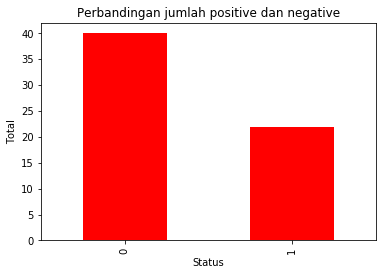

In [44]:
data_colon['status'].value_counts().plot(kind='bar', color="r")
plt.title("Perbandingan jumlah positive dan negative")
plt.xlabel('Status')
plt.ylabel('Total')
plt.show()

- Lung Cancer

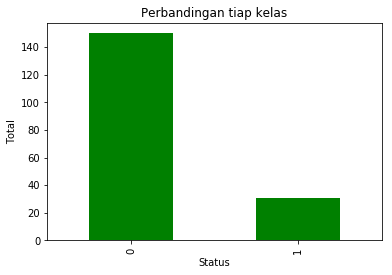

In [45]:
data_lung['status'].value_counts().plot(kind='bar', color="g")
plt.title("Perbandingan tiap kelas")
plt.xlabel('Status')
plt.ylabel('Total')
plt.show()

- Ovarian Cancer

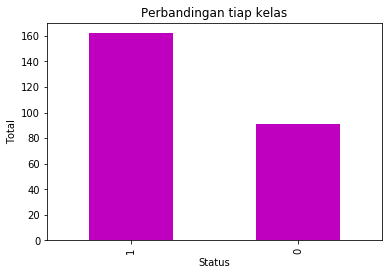

In [46]:
data_ovarian['status'].value_counts().plot(kind='bar', color="m")
plt.title("Perbandingan tiap kelas")
plt.xlabel('Status')
plt.ylabel('Total')
plt.show()

- Prostate Tumor

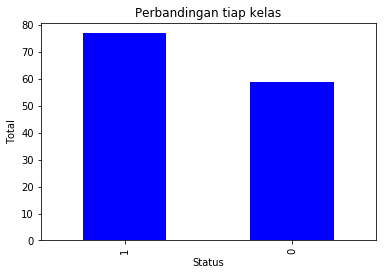

In [47]:
data_prostate['status'].value_counts().plot(kind='bar', color="b")
plt.title("Perbandingan tiap kelas")
plt.xlabel('Status')
plt.ylabel('Total')
plt.show()

- Central Nervous 

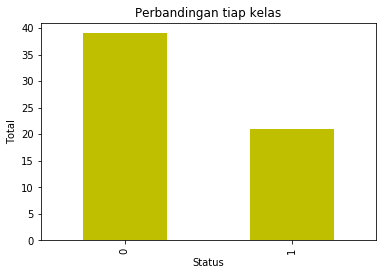

In [48]:
data_central['status'].value_counts().plot(kind='bar', color="y")
plt.title("Perbandingan tiap kelas")
plt.xlabel('Status')
plt.ylabel('Total')
plt.show()

### Features Target Split

- Colon Cancer

In [49]:
X_colon = data_colon.drop(['status'],axis=1)
y_colon = data_colon['status']

In [50]:
X_colon.shape

(62, 2000)

- Lung Cancer

In [51]:
X_lung = data_lung.drop(['status'],axis=1)
y_lung = data_lung['status']

In [52]:
X_lung.shape

(181, 12533)

- Ovarian Cancer

In [53]:
X_ovarian = data_ovarian.drop(['status'],axis=1)
y_ovarian = data_ovarian['status']

In [54]:
X_ovarian.shape

(253, 15154)

- Prostate Tumor

In [55]:
X_prostate = data_prostate.drop(['status'],axis=1)
y_prostate = data_prostate['status']

In [56]:
X_prostate.shape

(136, 12600)

- Central Nervous 

In [57]:
X_central = data_central.drop(['status'],axis=1)
y_central = data_central['status']

In [58]:
X_central.shape

(60, 7129)

### Train and Test Split

1. colon cancer

In [59]:
X_train_colon, X_test_colon, y_train_colon, y_test_colon = train_test_split(X_colon,y_colon, test_size=0.2,random_state=45)

2. Lung Cancer 

In [60]:
X_train_lung, X_test_lung, y_train_lung, y_test_lung = train_test_split(X_lung,y_lung, test_size=0.2,random_state=45)

3. Ovarian Cancer 

In [61]:
X_train_ovarian, X_test_ovarian, y_train_ovarian, y_test_ovarian = train_test_split(X_ovarian,y_ovarian, test_size=0.2,random_state=45)

4. Prostate Tumor

In [62]:
X_train_prostate, X_test_prostate, y_train_prostate, y_test_prostate = train_test_split(X_prostate,y_prostate, test_size=0.2,random_state=45)

5. Central Nervous 

In [63]:
X_train_central, X_test_central, y_train_central, y_test_central = train_test_split(X_central,y_central, test_size=0.2,random_state=45)

### Normalisasi

In [64]:
def minmax_scaler(X_train_, X_test_):
    scaler = MinMaxScaler()
    X_train_ = scaler.fit_transform(X_train_)
    X_test_ = scaler.transform(X_test_)
    return X_train_,X_test_

1. colon cancer

In [65]:
X_train_colon, X_test_colon = minmax_scaler(X_train_colon,X_test_colon)

2. Lung Cancer

In [66]:
X_train_lung, X_test_lung = minmax_scaler(X_train_lung, X_test_lung)

3. Ovarian Cancer

In [67]:
X_train_ovarin, X_test_ovarian = minmax_scaler(X_train_ovarian, X_test_ovarian)

4. Prostate Tumor 

In [68]:
X_train_prostate, X_test_prostate = minmax_scaler(X_train_prostate, X_test_prostate)

5. Central Nervous 

In [69]:
X_train_central, X_test_central = minmax_scaler(X_train_central, X_test_central)

### Reduksi Dimensi

In [70]:
def dwt(X_train, X_test):
    train_coef = pywt.dwt(X_train, 'db4')
    #(cA, cD) = train_coef
    test_coef = pywt.dwt(X_test, 'db4')
    #(cA, cD) = 
    return train_coef, test_coef

def koef_train(train_coef):
    (cA, cD) = train_coef
    return (cA, cD)

def koef_test(test_coef):
    (cA, cD) = test_coef
    return (cA, cD)

1. colon cancer

In [71]:
coef_train_colon, coef_test_colon = dwt(X_train_colon,X_test_colon)
X_trainColonCA, X_trainColonCD = koef_train(coef_train_colon)
X_testColonCA, X_testColonCD = koef_test(coef_test_colon)

In [72]:
X_testColonCA.shape

(13, 1003)

In [73]:
X_trainColonCD.shape

(49, 1003)

In [74]:
X_trainColonCA.shape

(49, 1003)

2. Lung Cancer

In [75]:
coef_train_lung, coef_test_lung = dwt(X_train_lung,X_test_lung)
X_trainLungCA, X_trainLungCD = koef_train(coef_train_lung)
X_testLungCA, X_testLungCD = koef_test(coef_test_lung)

In [76]:
X_trainLungCA.shape

(144, 6270)

In [77]:
X_trainLungCD.shape

(144, 6270)

In [78]:
X_testLungCA.shape

(37, 6270)

3. Ovarian Cancer

In [79]:
coef_train_ovarian, coef_test_ovarian = dwt(X_train_ovarian,X_test_ovarian)
X_trainOvarianCA, X_trainOvarianCD = koef_train(coef_train_ovarian)
X_testOvarianCA, X_testOvarianCD = koef_test(coef_test_ovarian)

In [80]:
X_trainOvarianCA.shape

(202, 7580)

In [81]:
X_testOvarianCA.shape

(51, 7580)

4. Prostate Tumor

In [82]:
coef_train_prostate, coef_test_prostate = dwt(X_train_prostate,X_test_prostate)
X_trainProstateCA, X_trainProstateCD = koef_train(coef_train_prostate)
X_testProstateCA, X_testProstateCD = koef_test(coef_test_prostate)

In [83]:
X_trainProstateCA.shape

(108, 6303)

In [84]:
X_testProstateCA.shape

(28, 6303)

5. Central Nervous 

In [85]:
coef_train_central, coef_test_central = dwt(X_train_central,X_test_central)
X_trainCentralCA, X_trainCentralCD = koef_train(coef_train_central)
X_testCentralCA, X_testCentralCD = koef_test(coef_test_central)

In [86]:
X_trainCentralCA.shape

(48, 3568)

In [87]:
X_testCentralCA.shape

(12, 3568)

In [89]:
X_trainCentralCD.shape

(48, 3568)

### Cross Validation and Hyperparameter Tuning

In [90]:
model_rfg = RandomForestClassifier()

#### Random Search Optimization

In [91]:
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto', 'log2'],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]
                     }

1. Colon Cancer Tuning

In [92]:
random_search_colon = RandomizedSearchCV(estimator=model_rfg,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8,
                                   n_jobs = -1
                                  )

# Fit the random search model
random_search_colon.fit(X_trainColonCA, y_train_colon)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [93]:
print("Best Params : ",random_search_colon.best_params_)
print()
means = random_search_colon.cv_results_['mean_test_score']
stds = random_search_colon.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, random_search_colon.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False}

0.653 (+/-0.197) for {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True}
0.633 (+/-0.154) for {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}
0.592 (+/-0.196) for {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}
0.673 (+/-0.147) for {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False}
0.653 (+/-0.255) for {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True}
0.612 (+/-0.218) for {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True}
0.612 (+/-0.122) for {'n_estimators': 400, 'min_samples_split': 2, 

2. Lung Cancer Tuning

In [94]:
random_search_lung = RandomizedSearchCV(estimator=model_rfg,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8,
                                   n_jobs = -1
                                  )

# Fit the random search model
random_search_lung.fit(X_trainLungCA, y_train_lung)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [95]:
print("Best Params : ",random_search_lung.best_params_)
print()
means = random_search_lung.cv_results_['mean_test_score']
stds = random_search_lung.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, random_search_lung.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False}

0.965 (+/-0.020) for {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True}
0.903 (+/-0.052) for {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}
0.896 (+/-0.000) for {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}
0.986 (+/-0.020) for {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False}
0.965 (+/-0.020) for {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True}
0.903 (+/-0.020) for {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True}
0.958 (+/-0.034) for {'n_estimators': 400, 'min_samples_split': 2, 

3. ovarian

In [96]:
random_search_ovarian = RandomizedSearchCV(estimator=model_rfg,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8,
                                   n_jobs = -1
                                  )

# Fit the random search model
random_search_ovarian.fit(X_trainOvarianCA, y_train_ovarian)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.7min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [97]:
print("Best Params : ",random_search_ovarian.best_params_)
print()
means = random_search_ovarian.cv_results_['mean_test_score']
stds = random_search_ovarian.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, random_search_ovarian.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False}

0.975 (+/-0.037) for {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True}
0.916 (+/-0.098) for {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}
0.911 (+/-0.088) for {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}
0.980 (+/-0.037) for {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False}
0.975 (+/-0.051) for {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True}
0.916 (+/-0.110) for {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True}
0.975 (+/-0.051) for {'n_estimators': 400, 'min_samples_split': 2, '

5. Prostate Tumor Tuning

In [98]:
random_search_prostate = RandomizedSearchCV(estimator=model_rfg,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8,
                                   n_jobs = -1
                                  )

# Fit the random search model
random_search_prostate.fit(X_trainProstateCD, y_train_prostate)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.5min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [99]:
print("Best Params : ",random_search_prostate.best_params_)
print()
means = random_search_prostate.cv_results_['mean_test_score']
stds = random_search_prostate.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, random_search_prostate.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False}

0.870 (+/-0.156) for {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True}
0.815 (+/-0.186) for {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}
0.843 (+/-0.111) for {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}
0.898 (+/-0.068) for {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False}
0.880 (+/-0.141) for {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True}
0.843 (+/-0.178) for {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True}
0.880 (+/-0.136) for {'n_estimators': 400, 'min_samples_split': 2, 

6. Central Nervous 

In [100]:
random_search_central = RandomizedSearchCV(estimator=model_rfg,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8,
                                   n_jobs = -1
                                  )

# Fit the random search model
random_search_central.fit(X_trainCentralCA, y_train_central)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [101]:
print("Best Params : ",random_search_central.best_params_)
print()
means = random_search_central.cv_results_['mean_test_score']
stds = random_search_central.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, random_search_central.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False}

0.604 (+/-0.156) for {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True}
0.604 (+/-0.156) for {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}
0.583 (+/-0.118) for {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}
0.667 (+/-0.156) for {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False}
0.604 (+/-0.156) for {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True}
0.604 (+/-0.059) for {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True}
0.604 (+/-0.156) for {'n_estimators': 400, 'min_samples_split': 2, 

### Grid Search

In [102]:
random_search_colon.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'bootstrap': False}

In [103]:
random_search_lung.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'bootstrap': False}

In [104]:
random_search_ovarian.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'bootstrap': False}

In [105]:
random_search_prostate.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'bootstrap': False}

In [106]:
random_search_central.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'bootstrap': False}

1. colon cancer

In [107]:
grid_params_colon = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto'],
               'min_samples_split': [10],
               'min_samples_leaf': [1],
               'bootstrap': [False]
                     }

In [108]:
GridDT_colon = GridSearchCV(estimator = model_rfg,
                      param_grid = grid_params_colon,
                      cv=3,
                      verbose = 1,
                      n_jobs = -1)
GridDT_colon.fit(X_trainColonCA,y_train_colon)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   11.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [109]:
print("Best Params : ",GridDT_colon.best_params_)
print()
means = GridDT_colon.cv_results_['mean_test_score']
stds = GridDT_colon.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, GridDT_colon.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}

0.673 (+/-0.147) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
0.633 (+/-0.154) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 400}
0.653 (+/-0.100) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 600}
0.633 (+/-0.154) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 800}
0.653 (+/-0.197) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000}


2. Lung Cancer

In [110]:
grid_params_lung = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto'],
               'min_samples_split': [10],
               'min_samples_leaf': [1],
               'bootstrap': [False]
                     }

In [111]:
GridDT_lung = GridSearchCV(estimator = model_rfg,
                      param_grid = grid_params_lung,
                      cv=3,
                      verbose = 1,
                      n_jobs = -1)
GridDT_lung.fit(X_trainLungCA,y_train_lung)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   21.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [112]:
print("Best Params : ",GridDT_lung.best_params_)
print()
means = GridDT_lung.cv_results_['mean_test_score']
stds = GridDT_lung.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, GridDT_lung.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}

0.986 (+/-0.020) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
0.986 (+/-0.020) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 400}
0.979 (+/-0.034) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 600}
0.979 (+/-0.034) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 800}
0.986 (+/-0.020) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000}


3. Prostate Tumor

In [113]:
grid_params_prostate = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto'],
               'min_samples_split': [10],
               'min_samples_leaf': [1],
               'bootstrap': [False]
                     }

In [114]:
GridDT_prostate = GridSearchCV(estimator = model_rfg,
                      param_grid = grid_params_prostate,
                      cv=3,
                      verbose = 1,
                      n_jobs = -1)
GridDT_prostate.fit(X_trainProstateCD,y_train_prostate)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   18.6s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [115]:
print("Best Params : ",GridDT_prostate.best_params_)
print()
means = GridDT_prostate.cv_results_['mean_test_score']
stds = GridDT_prostate.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, GridDT_prostate.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 800}

0.889 (+/-0.119) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
0.870 (+/-0.117) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 400}
0.889 (+/-0.088) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 600}
0.898 (+/-0.068) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 800}
0.870 (+/-0.111) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000}


4. Ovarian Cancer 

In [116]:
grid_params_ovarian = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto'],
               'min_samples_split': [5],
               'min_samples_leaf': [1],
               'bootstrap': [False]
                     }

In [117]:
GridDT_ovarian = GridSearchCV(estimator = model_rfg,
                      param_grid = grid_params_ovarian,
                      cv=3,
                      verbose = 1,
                      n_jobs = -1)
GridDT_ovarian.fit(X_trainOvarianCA,y_train_ovarian)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   30.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [118]:
print("Best Params : ",GridDT_ovarian.best_params_)
print()
means = GridDT_ovarian.cv_results_['mean_test_score']
stds = GridDT_ovarian.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, GridDT_ovarian.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 400}

0.975 (+/-0.051) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
0.980 (+/-0.037) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 400}
0.980 (+/-0.037) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 600}
0.980 (+/-0.037) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 800}
0.975 (+/-0.051) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}


5. Central Nervous 

In [119]:
grid_params_central = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto'],
               'min_samples_split': [10],
               'min_samples_leaf': [1],
               'bootstrap': [False]
                     }

In [120]:
GridDT_central = GridSearchCV(estimator = model_rfg,
                      param_grid = grid_params_central,
                      cv=3,
                      verbose = 1,
                      n_jobs = -1)
GridDT_central.fit(X_trainCentralCA,y_train_central)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   10.8s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [121]:
print("Best Params : ",GridDT_central.best_params_)
print()
means = GridDT_central.cv_results_['mean_test_score']
stds = GridDT_central.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, GridDT_central.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}

0.646 (+/-0.118) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
0.625 (+/-0.102) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 400}
0.646 (+/-0.118) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 600}
0.625 (+/-0.102) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 800}
0.625 (+/-0.102) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000}


### Classification

1. colon cancer

In [122]:
classifier_colon = GridDT_colon.best_estimator_

In [123]:
classifier_colon.fit(X_trainColonCA,y_train_colon)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [124]:
pred = classifier_colon.predict(X_testColonCA)
pred

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [125]:
pd.DataFrame({
    "status actual" : y_test_colon,
    "status predicted" : pred
})

,status actual,status predicted
5,1,1
27,0,0
59,1,1
40,0,0
41,1,1
52,0,0
25,0,0
19,1,1
26,0,0
18,0,0


In [126]:
accColon = accuracy_score(y_test_colon,pred)
accColon

1.0

In [127]:
print(classification_report(y_test_colon, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         5

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



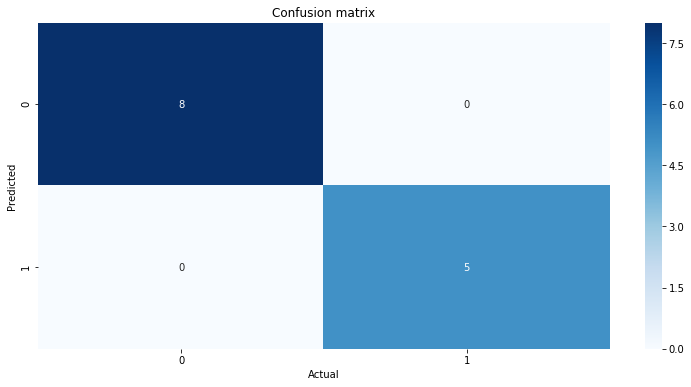

In [128]:
aux_df = data_colon[['status']].drop_duplicates().sort_values('status')
conf_matrix = confusion_matrix(y_test_colon, pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['status'].values, 
            yticklabels=aux_df['status'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [129]:
precision_colon = precision_score(y_test_colon, pred)
precision_colon

1.0

In [130]:
recall_colon = recall_score(y_test_colon,pred)
recall_colon

1.0

2. Lung Cancer

In [131]:
classifier_lung = GridDT_lung.best_estimator_

In [132]:
classifier_lung.fit(X_trainLungCA,y_train_lung)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [133]:
pred = classifier_lung.predict(X_testLungCA)
pred

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [134]:
pd.DataFrame({
    "status actual" : y_test_lung,
    "status predicted" : pred
})

,status actual,status predicted
132,0,0
69,0,0
13,1,1
28,0,0
118,0,0
10,1,1
0,1,1
3,1,1
32,0,0
103,0,0


In [135]:
accLung = accuracy_score(y_test_lung,pred)
accLung

1.0

In [136]:
print(classification_report(y_test_lung, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00         7

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



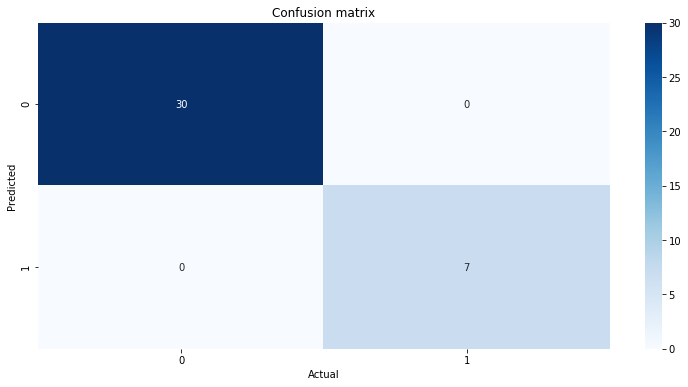

In [137]:
aux_df = data_lung[['status']].drop_duplicates().sort_values('status')
conf_matrix = confusion_matrix(y_test_lung, pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['status'].values, 
            yticklabels=aux_df['status'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

3. Prostate Tumor

In [138]:
classifier_prostate = GridDT_prostate.best_estimator_

In [139]:
classifier_prostate.fit(X_trainProstateCD,y_train_prostate)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [140]:
pred = classifier_prostate.predict(X_testProstateCD)
pred

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0], dtype=int64)

In [141]:
pd.DataFrame({
    "status actual" : y_test_prostate,
    "status predicted" : pred
})

,status actual,status predicted
80,0,0
2,1,1
94,0,0
71,0,1
51,1,1
3,1,1
28,1,1
84,0,1
26,0,0
1,1,1


In [142]:
accProstate = accuracy_score(y_test_prostate,pred)
accProstate

0.8571428571428571

In [143]:
print(classification_report(y_test_prostate, pred))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.85      0.94      0.89        18

    accuracy                           0.86        28
   macro avg       0.86      0.82      0.84        28
weighted avg       0.86      0.86      0.85        28



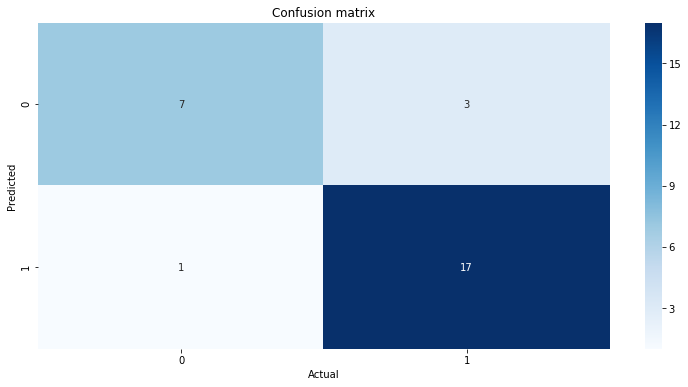

In [144]:
aux_df = data_prostate[['status']].drop_duplicates().sort_values('status')
conf_matrix = confusion_matrix(y_test_prostate, pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['status'].values, 
            yticklabels=aux_df['status'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

4. Ovarian Cancer

In [145]:
classifier_ovarian = GridDT_ovarian.best_estimator_

In [146]:
classifier_ovarian.fit(X_trainOvarianCA,y_train_ovarian)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [147]:
pred = classifier_ovarian.predict(X_testOvarianCA)
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [148]:
pd.DataFrame({
    "status actual" : y_test_ovarian,
    "status predicted" : pred
})

,status actual,status predicted
38,0,0
83,0,0
72,0,0
30,0,0
79,0,0
73,0,0
47,0,0
141,1,1
224,1,1
112,1,1


In [149]:
accOvarian = accuracy_score(y_test_ovarian,pred)
accOvarian

1.0

In [150]:
print(classification_report(y_test_ovarian, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        30

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



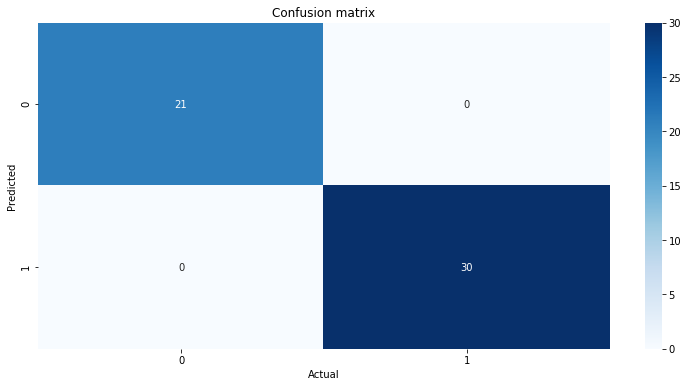

In [151]:
aux_df = data_ovarian[['status']].drop_duplicates().sort_values('status')
conf_matrix = confusion_matrix(y_test_ovarian, pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['status'].values, 
            yticklabels=aux_df['status'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

5. Central Nervous 

In [152]:
classifier_central = GridDT_central.best_estimator_

In [153]:
classifier_central.fit(X_trainCentralCA,y_train_central)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [154]:
pred = classifier_central.predict(X_testCentralCA)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [155]:
pd.DataFrame({
    "status actual" : y_test_central,
    "status predicted" : pred
})

,status actual,status predicted
5,1,0
26,0,0
57,0,0
39,0,0
36,0,0
50,0,0
42,0,0
19,1,0
25,0,0
18,1,0


In [156]:
accCentral = accuracy_score(y_test_central,pred)
accCentral

0.75

In [157]:
print(classification_report(y_test_central, pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       0.00      0.00      0.00         3

    accuracy                           0.75        12
   macro avg       0.38      0.50      0.43        12
weighted avg       0.56      0.75      0.64        12



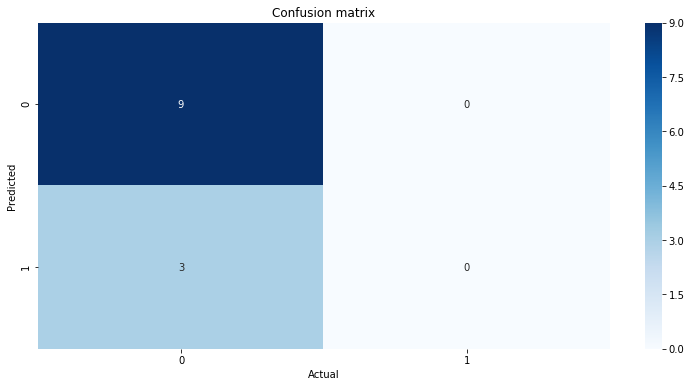

In [158]:
aux_df = data_central[['status']].drop_duplicates().sort_values('status')
conf_matrix = confusion_matrix(y_test_central, pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['status'].values, 
            yticklabels=aux_df['status'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

### Result

In [159]:
hasil = pd.DataFrame({
    "dataset" : ['Colon Cancer', 'Lung Cancer','Ovarian Cancer', 'Prostate Tumor', 'Central Nervous'],
    "Akurasi" : [accColon,accLung,accOvarian,accProstate,accCentral]
})

hasil = hasil.set_index(['dataset'],drop=True)
hasil

,Akurasi
dataset,
Colon Cancer,1.000000
Lung Cancer,1.000000
Ovarian Cancer,1.000000
Prostate Tumor,0.857143
Central Nervous,0.750000


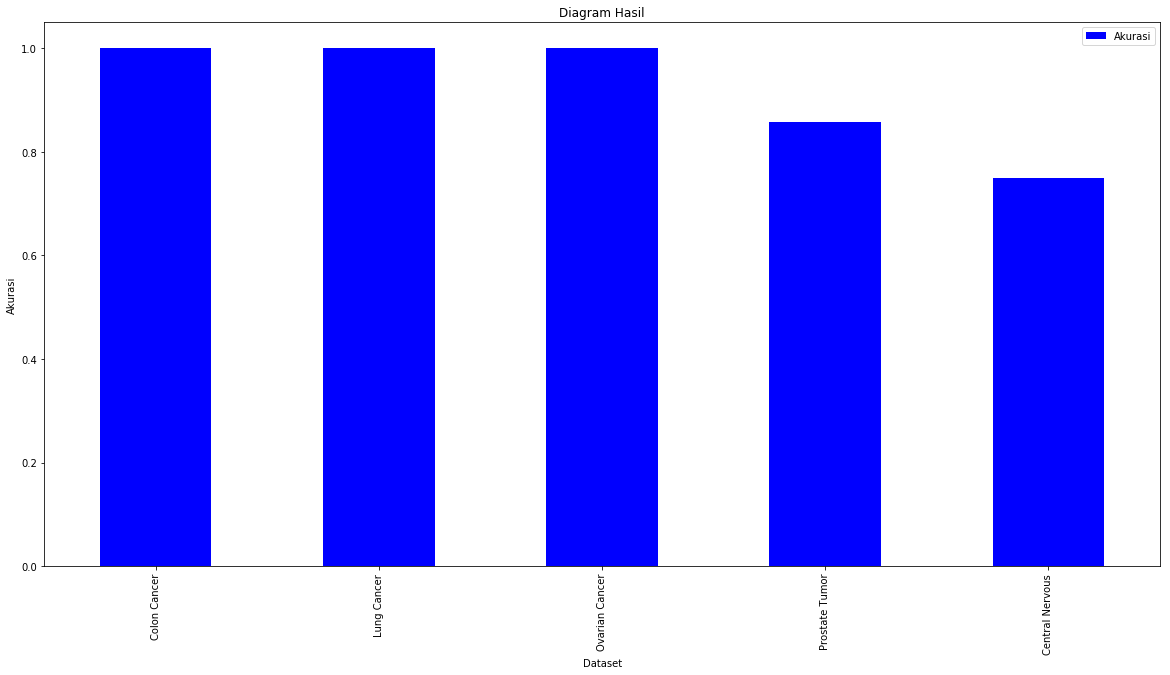

In [160]:
hasil.loc[:,['Akurasi']].plot.bar(color=['b'], figsize=(20,10))
plt.title("Diagram Hasil")
plt.xlabel('Dataset')
plt.ylabel('Akurasi')
plt.show()